# Bike Sharing Dataset (Regression)

## Introduction

---



<font color="29BF4E">

One of the most important aspects if not the most important in being a company that provides
service and works in this area of industry is being able to spot their target consumers. In our project,
we tackle this spesfic concern by using a dataset about a bike sharing company located at Washington DC.
Bike sharing system is basically a service for people to rent and use bikes for some time in exchange for
a fee. The data set consist of information such as weather variables, rental hours, number of bikes rented, their users, etc.
To cover such topic, we plan to focus on the area of usage, more spesifically, weather people use the bikes as
a hobby or for transportation. The answer to this question is crucial to such a company as it will allow the firm
to more easily and efficiently spot and act upon their target customers. We plan to classify the rental hours and
weather conditions after cleaning and sorting the data with respect to rental hours in order to monitor
the working hours and the purpose of use. In the end of our work, we finally aim to be able to pinpoint
the future costumer behaviours as well as estimation of demand for bike with the help of previous data.
</font>

### **Problem Definition**


---


<font color="FAA020">
State your problem in technical terms. What is your end goal? How are you going to solve it?

A bike sharing company would like to know about customer behaviour for given parameters such as weather and time in order to optimize its resources. To have an general understading about customer behavior we try tackle the questions, 'Are bikes used for transportation or hobby purposes?' and 'How can we estimate bike usage for given parameters?'. To answer those questions, we will explore our dataset starting with cleaning to visualizing. Then we will propose hypothesis with regards to our general questions and we will use these processed data to answer the questions. Furthermore, as we progress through the course we will implement Machine Learning models such as regression to our data in order to make estimations. As we get answers to our claims we will then draw conclusions about our general problems.
</font>

### **Utilized Datasets**

---



<font color="blue">
Describe the utilized datasets in detail. Provide the data source (links if possible), number of obervations, data types, display the distributions of various variables and plot figures that helps reader understand what you are dealing with.
</font>


We are going to use a dataset of a Capital bike sharing system (collected between 2011- 2012) provided from UCI- Machine Learning Repository. We are using hour.csv file provided.

Data Source: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

Data Types: Integer, Real

This dataset constitutes 17389 observations. In addition, there 16 attributes which are:

\- instant: record index

\- dteday: date

\- season: season (1:winter, 2:spring, 3:summer, 4:fall)

\- yr: year (0: 2011, 1:2012)

\- mnth: month ( 1 to 12)

\-	hr: hour (0 to 23)

\-	holiday: weather day is holiday or not (extracted from [Web Link])

\-	weekday: day of the week

\- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

\-	weathersit:
*	1: Clear, Few clouds, Partly cloudy, Partly cloudy
*	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

\-	temp: Normalized temperature in Celsius. The values are derived via
(t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

\-	hum: Normalized humidity. The values are divided to 100 (max)

\-	windspeed: Normalized wind speed. The values are divided to 67 (max)

\-	casual: count of casual users

\-	registered: count of registered users

\-	cnt: count of total rental bikes including both casual and registered

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the library to perform statistical tests
from scipy import stats
from scipy import special
from os.path import join
import seaborn as sns

%matplotlib inline
from google.colab import drive
drive.mount("./drive")


Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
fname = "hour.csv"
fname_2 = "day.csv"
path_prefix = "./drive/My Drive"
df = pd.read_csv(join(path_prefix,fname))
df_2 = pd.read_csv(join(path_prefix,fname_2))
df_c = df.copy()
new_data = df.copy()
new_data_2 = df_2.copy()

#### **Data Cleaning and Info**

---



In [ ]:
# Since 'hum', 'atemp' and 'windspeed' columns are normalized, they should be in the range of [0,1]. However being equal to 0 or 1 is impossible.
zero_values_ws = new_data.windspeed.value_counts()[0]                           # there are some dirty data denoted as '0' in 'windspeed' column
mean_ws = new_data['windspeed'].sum()/(new_data.shape[0]- zero_values_ws)       # find the mean without zero values
new_data.loc[(new_data.windspeed == 0.00), 'windspeed'] = mean_ws               # change zero values with mean

new_data.loc[(new_data.atemp == 1.00), 'atemp'] = 0.00                          # there are some dirty data denoted as '0' or '1' in 'atemp' column
zero_values_atemp = new_data.atemp.value_counts()[0]
mean_atemp = new_data['atemp'].sum()/(new_data.shape[0]- zero_values_atemp)     # find the mean without zero values
new_data.loc[(new_data.atemp == 0.00), 'atemp'] = mean_atemp                    # change zero values with mean

new_data.loc[(new_data.hum == 1.00), 'hum'] = 0.00                              # there are some dirty data denoted as '0' or '1' in 'hum' column
zero_values_hum = new_data.hum.value_counts()[0]
mean_hum = new_data['hum'].sum()/(new_data.shape[0]- zero_values_hum)           # find the mean without zero values
new_data.loc[(new_data.hum == 0.00), 'hum'] = mean_hum                          # change zero values with mean

# Check for Na Values
new_data.isna().sum() # as it can be seen there is no NA value to deal with, if there were, to prevent misunderstanding we planned to delete that row.

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data Cleaning process shows that our dataset do not contain any NaN or undesired data, which is fortunete.

In [ ]:
new_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.217363,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.217363,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.217363,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.217363,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.217363,0,1,1







**Info about DataSet**
---

In [ ]:
# data cleaning and shape
print('Data is a DataFrame object with {} rows and {} columns.'.format(df_c.shape[0], df_c.shape[1]))
print('\nData types used in columns are:', df_c.info())

Data is a DataFrame object with 17379 rows and 17 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage



---



#### **Statistical Properties of Each Attributes**

---



In [ ]:
new_data = new_data.drop(["weekday","holiday","dteday"], axis = 1)
new_data.describe()

,instant,season,yr,mnth,hr,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.682721,1.425283,0.496987,0.475800,0.622146,0.217363,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.465431,0.639357,0.192556,0.171728,0.185848,0.098912,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,1.000000,1.000000,0.500000,0.484800,0.622146,0.217363,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,4.000000,1.000000,0.984800,0.970000,0.850700,367.000000,886.000000,977.000000


#### **Time Type**

---



In order to have a clearer understanding of the data, the first step that we have taken is to divide the data according to  the customers timing: spare time, pre-post working hour and working hour.

The values of the "Time Type" is divided as:
* Working Hour: weekdays between 10 a.m. to 4 p.m.
* Pre-post Working Hour: weekdays between 6 a.m. to 10 a.m. and 4 p.m. to 8 p.m.
* Spare Time: holidays, weekends and weekdays between 12 a.m. to 6 a.m. and 8 p.m. to 12 a.m.

typeTime
Pre-post Working Hour    1356485
Spare Time               1253994
Working Hour              682200
Name: cnt, dtype: int64

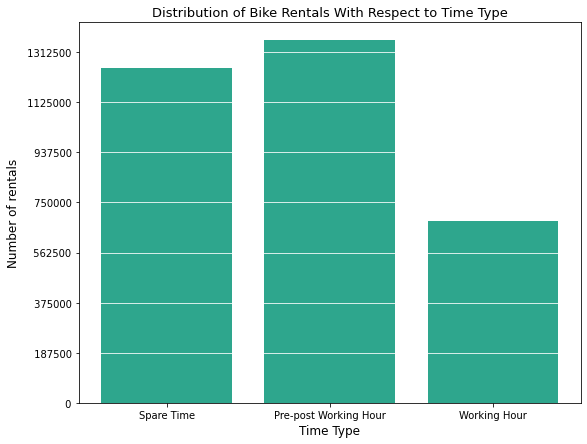

In [ ]:
#CLASSIFYING AND ANALYSING TIME TYPE - working hours(2) / before-after working hours(1) / spare time (0)

time_list = []

for index, row in new_data.iterrows():

  #if it is a working day
  if(row["workingday"] == 1):

    #if within working hours
    if(row["hr"] >= 10 and row["hr"] <= 16):
      time_list.append("Working Hour")

    #if within before-after working hours
    elif (((row["hr"] >= 6) and (row["hr"] < 10)) or ((row["hr"] > 16) and (row["hr"] <= 20))):
      time_list.append("Pre-post Working Hour")

    #if within spare time
    else:
      time_list.append("Spare Time")

  #if it is not a working day
  else:
    time_list.append("Spare Time")

new_data["typeTime"] = time_list

typeTime_counts = new_data["typeTime"].value_counts()

grouped_data = new_data.groupby(by="typeTime")["cnt"].sum()

cnt_list_time = []

bad_count = grouped_data["Spare Time"]
normal_count = grouped_data["Pre-post Working Hour"]
optimal_count = grouped_data["Working Hour"]

cnt_list_time.append(bad_count)
cnt_list_time.append(normal_count)
cnt_list_time.append(optimal_count)

y_axis_nums = np.linspace(0,1500000, 9)
y_labels = [f"{y_axis_num: .0f}" for y_axis_num in y_axis_nums]


plt.figure(figsize=(9,7))
plt.yticks(y_axis_nums,y_labels)
plt.bar(typeTime_counts.index,cnt_list_time, color ="#2EA68D", width = 0.8)
plt.title("Distribution of Bike Rentals With Respect to Time Type",fontdict= {"size": 13})
plt.ylabel("Number of rentals",fontdict= {"size": 12})
plt.xlabel("Time Type",fontdict= {"size": 12})
plt.grid(axis="y", color = "white")

grouped_data

------------------------------------

The second step is examining the temperature, windspeed and humidity data that was given to us. With further researh we came to a conclusion of categorising the data into three parts: optimal, normal and bad. The reason  behind this division is to easily analyise the dataset.

#### Temperature

,instant,season,yr,mnth,hr,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,typeTime,typeTemp
0,1,1,0,1,0,0,1,0.24,0.2879,0.81,0.217363,3,13,16,Spare Time,Bad
1,2,1,0,1,1,0,1,0.22,0.2727,0.80,0.217363,8,32,40,Spare Time,Bad
2,3,1,0,1,2,0,1,0.22,0.2727,0.80,0.217363,5,27,32,Spare Time,Bad
3,4,1,0,1,3,0,1,0.24,0.2879,0.75,0.217363,3,10,13,Spare Time,Bad
4,5,1,0,1,4,0,1,0.24,0.2879,0.75,0.217363,0,1,1,Spare Time,Bad


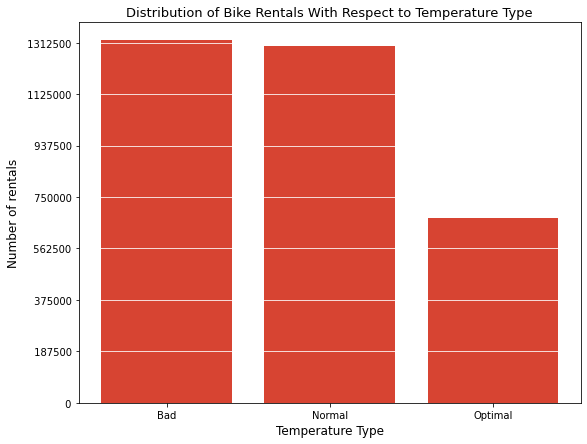

In [ ]:
#CLASSIFYING AND ANALYSING TEMPERATURE

def normalizeTemp(temp): #for normalizing temperatures according to the dataset
  t_min = -8
  t_max = 39
  norm_temp = (temp-t_min)/(t_max-t_min)
  return norm_temp

temp_type_list = []

for index, row in new_data.iterrows():

  #if temperature is optimal for cycling
  if (row["temp"] >= normalizeTemp(15.5) and row["temp"] <= normalizeTemp(21.1)):
    temp_type_list.append("Optimal")

  #if temperature is normal for cycling
  elif ((row["temp"] > normalizeTemp(21.1) and row["temp"] < normalizeTemp(26.6)) or (row["temp"] > normalizeTemp(10) and row["temp"] < normalizeTemp(15.5))):
    temp_type_list.append("Normal")

  #if temperature is bad for cycling
  else:
    temp_type_list.append("Bad")

new_data["typeTemp"] =  temp_type_list

type_Temp_count =  new_data["typeTemp"].value_counts()

grouped_data = new_data.groupby(by="typeTemp")["cnt"].sum()

cnt_list_temp = []

bad_count = grouped_data["Bad"]
normal_count = grouped_data["Normal"]
optimal_count = grouped_data["Optimal"]

cnt_list_temp.append(bad_count)
cnt_list_temp.append(normal_count)
cnt_list_temp.append(optimal_count)

y_axis_nums = np.linspace(0,1500000, 9)
y_labels = [f"{y_axis_num: .0f}" for y_axis_num in y_axis_nums]

plt.figure(figsize=(9,7))
plt.yticks(y_axis_nums,y_labels)
plt.bar(type_Temp_count.index,cnt_list_temp, color ="#D74432", width = 0.8)
plt.title("Distribution of Bike Rentals With Respect to Temperature Type",fontdict= {"size": 13})
plt.ylabel("Number of rentals",fontdict= {"size": 12})
plt.xlabel("Temperature Type",fontdict= {"size": 12})
plt.grid(axis="y", color = "white")

#grouped_data
new_data.head()

The interval for categorising the temperature dataas "Temperature Type":
* Bad: below 10 Celsius and higher than 26.6 Celsius
* Normal : between 10 Celsius to 15.5 Celsius and 21.1 Celsius to 26.6 Celsius
* Optimal: between 15.5 Celsius to 21.1 Celcius

#### Windspeed

typeWindspeed
Bad         127255
Normal      363554
Optimal    2801870
Name: cnt, dtype: int64

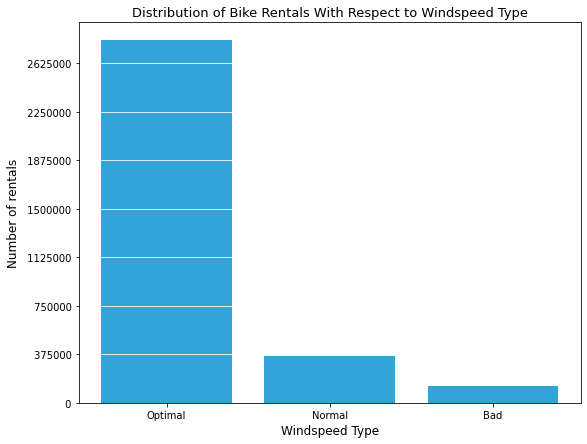

In [ ]:
#CLASSIFYING AND ANALYSING WINDSPEED

def normalizeWind(wind): #for normalizing windspeed according to the dataset
  max_wind_speed = 67
  norm_wind = wind/max_wind_speed
  return norm_wind

wind_type_list = []

for index, row in new_data.iterrows():

  #if windspeed is optimal for cycling
  if (row["windspeed"] <= normalizeWind(20)):
    wind_type_list.append("Optimal")

  #if windspeed is normal for cycling
  elif ((row["windspeed"] > normalizeWind(20) and row["windspeed"] < normalizeWind(30))):
    wind_type_list.append("Normal")

  #if windspeed is bad for cycling
  else:
    wind_type_list.append("Bad")

new_data["typeWindspeed"] =  wind_type_list

type_wind_count =  new_data["typeWindspeed"].value_counts()

grouped_data = new_data.groupby(by="typeWindspeed")["cnt"].sum()

cnt_list_wind = []

bad_count = grouped_data["Bad"]
normal_count = grouped_data["Normal"]
optimal_count = grouped_data["Optimal"]

cnt_list_wind.append(optimal_count)
cnt_list_wind.append(normal_count)
cnt_list_wind.append(bad_count)

y_axis_nums = np.linspace(0,3000000, 9)
y_labels = [f"{y_axis_num: .0f}" for y_axis_num in y_axis_nums]

plt.figure(figsize=(9,7))
plt.yticks(y_axis_nums,y_labels)
plt.bar(type_wind_count.index,cnt_list_wind, color ="#32A4D7", width = 0.8)
plt.title("Distribution of Bike Rentals With Respect to Windspeed Type",fontdict= {"size": 13})
plt.ylabel("Number of rentals",fontdict= {"size": 12})
plt.xlabel("Windspeed Type",fontdict= {"size": 12})
plt.grid(axis="y", color = "white")

grouped_data

The interval for categorising the windpeed data "Windspeed Type":
* Optimal: below 20 m/s
* Normal: between 20 m/s to 30 m/s
* Bad: higher than 30 m/s


#### Weathersit

typeWeathersit
Bad            223
Normal      954283
Optimal    2338173
Name: cnt, dtype: int64

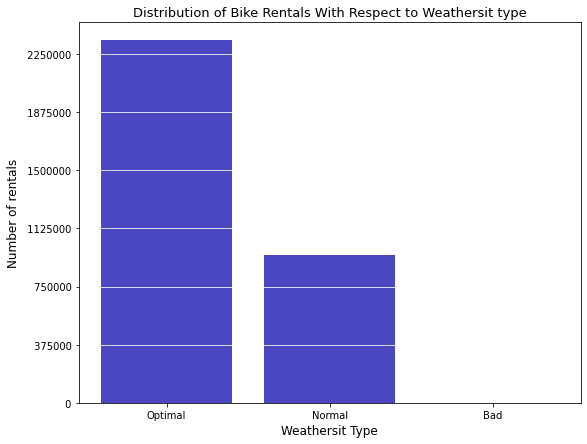

In [ ]:
#CLASSIFYING AND ANALYSING WEATHERSIT

weathersit_type_list = []

for index, row in new_data.iterrows():

  #if weathersit is optimal for cycling
  if (row["weathersit"] == 1):
    weathersit_type_list.append("Optimal")

  #if weathersit is normal for cycling
  elif ((row["weathersit"] == 2 or row["weathersit"] == 3)):
    weathersit_type_list.append("Normal")

  #if weathersit is bad for cycling
  else:
    weathersit_type_list.append("Bad")

new_data["typeWeathersit"] =  weathersit_type_list

type_weathersit_count =  new_data["typeWeathersit"].value_counts()

grouped_data = new_data.groupby(by="typeWeathersit")["cnt"].sum()

cnt_list_weathersit= []

bad_count = grouped_data["Bad"]
normal_count = grouped_data["Normal"]
optimal_count = grouped_data["Optimal"]

cnt_list_weathersit.append(optimal_count)
cnt_list_weathersit.append(normal_count)
cnt_list_weathersit.append(bad_count)

y_axis_nums = np.linspace(0,3000000, 9)
y_labels = [f"{y_axis_num: .0f}" for y_axis_num in y_axis_nums]

plt.figure(figsize=(9,7))
plt.yticks(y_axis_nums,y_labels)
plt.bar(type_weathersit_count.index,cnt_list_weathersit, color ="#4B47C3", width = 0.8)
plt.title("Distribution of Bike Rentals With Respect to Weathersit type",fontdict= {"size": 13})
plt.ylabel("Number of rentals",fontdict= {"size": 12})
plt.xlabel("Weathersit Type",fontdict= {"size": 12})
plt.grid(axis="y", color = "white")

grouped_data

The interval for categorising the weathersit data "Weathersit Type":
* Optimal: 1
* Normal: 2 and 3
* Bad: 4


#### Humidity

typeHumidity
Bad        1379247
Normal      768023
Optimal    1145409
Name: cnt, dtype: int64

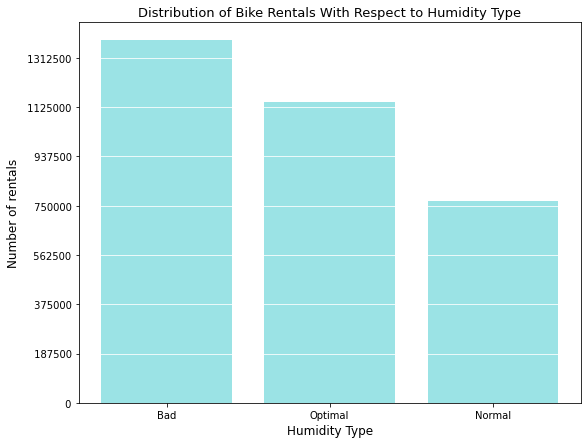

In [ ]:
#CLASSIFYING AND ANALYSING HUMIDITY LEVEL

def normalizeHum(hum): #for normalizing humidity according to the dataset
  norm_hum = hum/100
  return norm_hum

weathersit_type_list = []

for index, row in new_data.iterrows():

  #if humidity is optimal for cycling
  if (row["hum"] >= normalizeHum(30) and row["hum"] <= normalizeHum(50)):
    weathersit_type_list.append("Optimal")

  #if humidity is normal for cycling
  elif ((row["hum"] > normalizeHum(50) and row["hum"] <= normalizeHum(60)) or (row["hum"] >= normalizeHum(20) and row["hum"] < normalizeHum(30))):
    weathersit_type_list.append("Normal")

  #if humidity is bad for cycling
  else:
    weathersit_type_list.append("Bad")

new_data["typeHumidity"] =  weathersit_type_list

type_humidity_count =  new_data["typeHumidity"].value_counts()

grouped_data = new_data.groupby(by="typeHumidity")["cnt"].sum()

cnt_list_humidity= []

optimal_count = grouped_data["Optimal"]
normal_count = grouped_data["Normal"]
bad_count = grouped_data["Bad"]

cnt_list_humidity.append(bad_count)
cnt_list_humidity.append(optimal_count)
cnt_list_humidity.append(normal_count)

y_axis_nums = np.linspace(0,1500000, 9)
y_labels = [f"{y_axis_num: .0f}" for y_axis_num in y_axis_nums]

plt.figure(figsize=(9,7))
plt.yticks(y_axis_nums,y_labels)
plt.bar(type_humidity_count.index,cnt_list_humidity, color ="#9BE3E5", width = 0.8)
plt.title("Distribution of Bike Rentals With Respect to Humidity Type",fontdict= {"size": 13})
plt.ylabel("Number of rentals",fontdict= {"size": 12})
plt.xlabel("Humidity Type",fontdict= {"size": 12})
plt.grid(axis="y", color = "white")

grouped_data

The interval for categorising the humidity data "Humidity Type":
* Optimal: between 30% to 50%
* Normal: between 20% to 30% and 50% to 60%
* Bad: below 20% and higher than 60%


## **Data Exploration**

---



<font color="lightblue">
Explore the relationship between different variables across datasets. Perform hypothesis tests if necessary. Comment on your resulting figures and findings.

This section corresponds to the work you have done in the progress report.
</font>

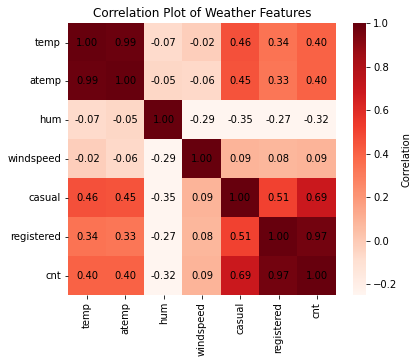

In [ ]:
# correlation bw weather features and count of bike rentals
import seaborn as sns
weatherFeatures = df_c.iloc[0:, 10:17]
corr = weatherFeatures.corr()
corr = corr.round(decimals = 2)
fig = plt.figure(figsize  = (6,5))
plt.title('Correlation Plot of Weather Features')
heatmap = sns.heatmap(corr, cmap = 'Reds', annot = True, vmin = -0.25, vmax = 1.0, fmt = '.2f',
                      cbar_kws={'label': 'Correlation'}, annot_kws={'color': 'black'})

Heatmap shows that amongst weather conditions, tempreture and humidity are the most correlated with the number of bike rentals. Therefore, will be proiritized when used as a feature vector in regression modeling.

In [ ]:
df_c

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,typeTime,weatherPoint
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Spare Time,56.832090
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Spare Time,56.309046
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Spare Time,56.309046
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Spare Time,60.165424
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Spare Time,60.165424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,Pre-post Working Hour,65.910224
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,Pre-post Working Hour,65.910224
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,Spare Time,65.910224
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,Spare Time,68.800213


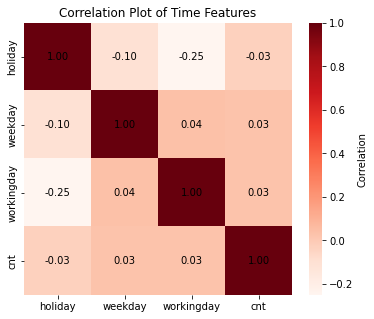

In [ ]:
# correlation bw time features and count of bike rentals
import seaborn as sns
weatherFeatures = df_c.iloc[0:, 6:9]
weatherFeatures['cnt'] = df_c['cnt']
corr = weatherFeatures.corr()
corr = corr.round(decimals = 2)
fig = plt.figure(figsize  = (6,5))
plt.title('Correlation Plot of Time Features')
heatmap = sns.heatmap(corr, cmap = 'Reds', annot = True, vmin = -0.25, vmax = 1.0, fmt = '.2f',
                      cbar_kws={'label': 'Correlation'}, annot_kws={'color': 'black'})

##Hypothesis Testing

In this section we will explain the main purpose of our study and make our claim that we will test using hypothesis tests, meaning that we will try to make inferences about our population using sample data.


##Methodology**

1.   **Determining Hypothesis**
  *   To conduct hypothesis tests we will
first determine commonly accepted hypothesis as current fact then try to prove an alternative claim using explored data.


2.   **Test Statistics**
  * Determine test type
  * Use data to test hypothesis

3. **Find p-value and Conclude**










Question 1: Does optimal weather parameters has an effect on shared bike count of casual users?

---



In [ ]:
# Population parameters
df = new_data
# count.mean > optimal weather
populationMean = df['cnt'].mean()
populationStd = np.std(df['cnt'])

In [ ]:
# Sample Parameters
df_sample = new_data[new_data['typeTemp'] == 'Optimal']

sampleSize = df_sample.shape[0]
sampleMean = df_sample['cnt'].mean()
sampleStd = np.std(df_sample['cnt']) / np.sqrt(sampleSize)
offset = 4*sampleStd

In [ ]:
# Z-score
z_score = (sampleMean - populationMean) / populationStd / np.sqrt(sampleSize)
print("z-score: {}".format(z_score))

z-score: 0.0019490538238760206


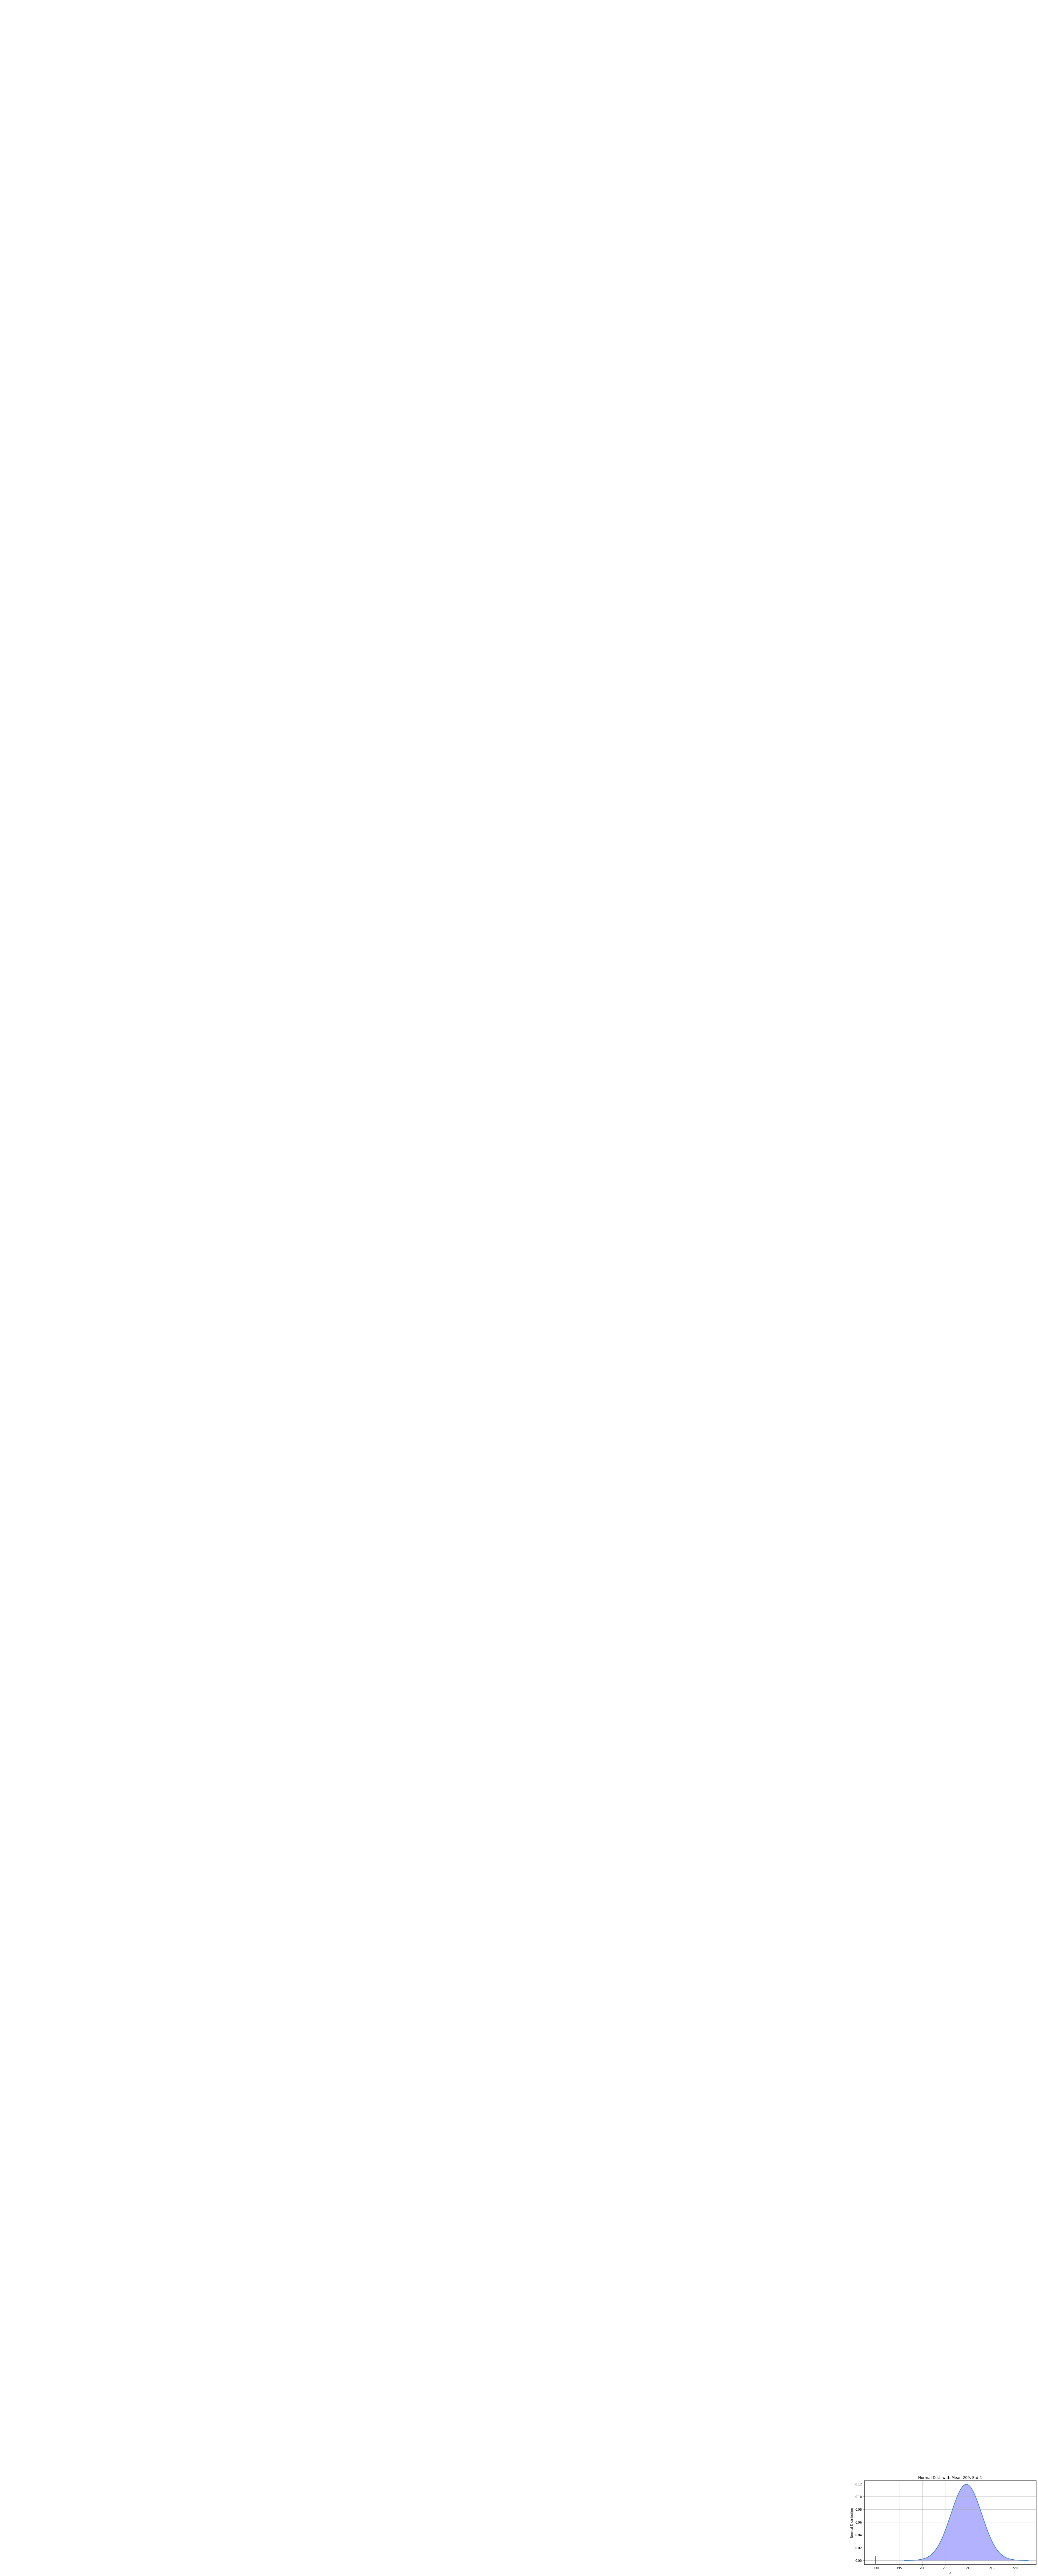

probability: 100.15551189696438%


In [ ]:
x = np.linspace(sampleMean - offset, sampleMean + offset, int(sampleSize))
y = stats.norm.pdf(x,sampleMean, sampleStd)

plt.figure(figsize=(10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
plt.fill_between(x, y, alpha=0.3, color="b")

# display the z-score locations
plt.axvline(populationMean - z_score*populationStd, ymax=0.1, color="red")
plt.axvline(populationMean + z_score*populationStd, ymax=0.1, color="red")

# annotate the sample mean
plt.annotate(
    "Sample Mean", # annotation text
    xy=(populationMean + z_score*populationStd, 1), # annotated coordinate
    xytext=(1, 4), # annotation text coordinate
    arrowprops={"arrowstyle": "simple"}) # arrow style

plt.title(f"Normal Dist. with Mean {int(sampleMean)}, Std {int(sampleStd)}")
plt.show()

prob = 2*stats.norm.cdf(z_score)
print(f"probability: {prob*100}%")


We estimated that in optimal temprature conditions its very likely for count mean to be bigger that the average count mean. Even though we had a unexpected results its clear that optimal weather conditions play a huge role in bike sharing

Question 2: Do Registered users dominate in work hours?

---



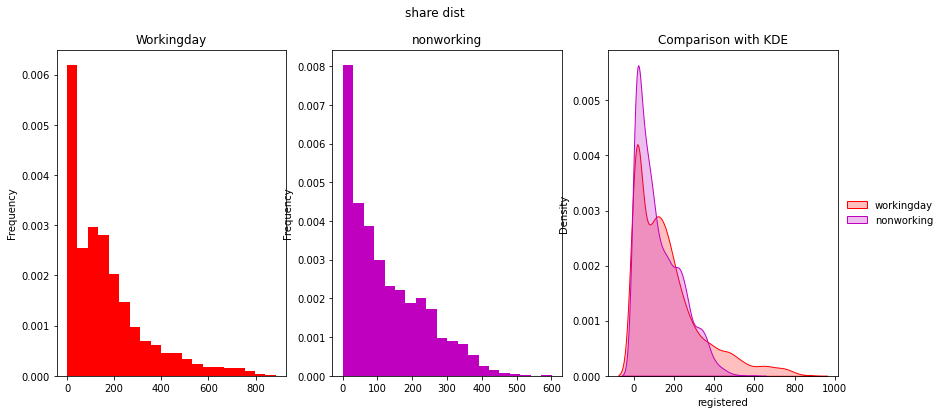

In [ ]:
working = df[df.workingday==1]['registered']
nonworking = df[df.workingday==0]['registered']

fig, ax = plt.subplots(1, 3, figsize = (14,6))

working.plot(kind='hist', ax = ax[0], bins=20, label='workingday', color = 'r', density=True)
ax[0].set_title('Workingday')

nonworking.plot(kind='hist', ax = ax[1], bins=20, label='nonworking', color = 'm', density=True)
ax[1].set_title('nonworking')

sns.kdeplot(working, shade=True, label="workingday", ax=ax[2], color="r")
sns.kdeplot(nonworking, shade=True, label="nonworking", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.suptitle("share dist")
plt.show()

Our plot shows that in comparison to our hypothesis which was workingdays would be more likely to be crowded, in constrast its shown that nonworking days are more crowded. Which shows that bikes are used not only as a transportation tool but also for hobbies

Question 3: Do registered users pile up at the start and end of work hours?

---



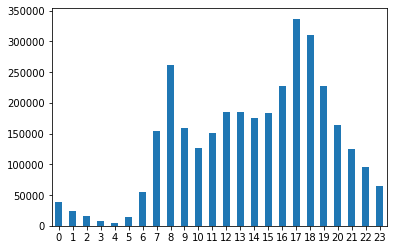

In [ ]:
hour_count = {}
for i in range(24):
  hour_count[i] = df[df.hr==i]['cnt'].sum()
hc_s = pd.Series(hour_count)

ax = hc_s.plot.bar(x='lab', y='val', rot=0)
plt.show()

Our plot shows that, indeed, at 8 when people go to work and at 17-18-19 when they leave are piled up since bikes are used as a transportation tool.

##**Machine Learning Models**

---



<font color="lightblue">
This is the section that you primarily need work on for the final report. Implement at least two machine learning models so that you can compare them.
</font>

We planned to implement 3 machine learning models.


1.   Linear Regression
2.   Polynomial Regression
3.   Random Forest


With the help of hyperparameter tuning, we aimed to find best parameters to reach least error in the machine learning model 'random forest'.
After calculating all models' error values, we are going to choose the one which can predict the future values best. This is the model with least error values.

In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

In [ ]:
#CLASSIFYING AND ANALYSING TIME TYPE - working hours(2) / before-after working hours(1) / spare time (0)
time_list = []

for index, row in df_c.iterrows():

  #if it is a working day
  if(row["workingday"] == 1):

    #if within working hours
    if(row["hr"] >= 10 and row["hr"] <= 16):
      time_list.append("Working Hour")

    #if within before-after working hours
    elif (((row["hr"] >= 6) and (row["hr"] < 10)) or ((row["hr"] > 16) and (row["hr"] <= 20))):
      time_list.append("Pre-post Working Hour")

    #if within spare time
    else:
      time_list.append("Spare Time")

  #if it is not a working day
  else:
    time_list.append("Spare Time")

df_c["typeTime"] = time_list

Calculating 'Weather Score' to have a general idea on weather

In [ ]:
def normalizeTemp(temp): #for normalizing temperatures according to the dataset
  t_min = -8
  t_max = 39
  norm_temp = (temp-t_min)/(t_max-t_min)
  return norm_temp


def tempScore(temp):
  min_T = -8
  max_T = 39
  temp = (max_T - min_T) * temp + min_T

  medianOptimal = (26.6+15.5)/2
  deviationConstant = 100 / max(abs(medianOptimal-max_T),abs(medianOptimal-min_T))

  temperaturePoint = 100-deviationConstant*abs(medianOptimal-temp)
  return temperaturePoint

tempScore(normalizeTemp(21))

def humScore(hum):
  min_H = 0
  max_H = 100
  hum = (max_H - min_H) * hum + min_H

  medianOptimal = (50+30)/2
  deviationConstant = 100 / max(abs(medianOptimal-max_H),abs(medianOptimal-min_H))

  humidityPoint = 100-deviationConstant*abs(medianOptimal-hum)
  return humidityPoint

humScore(normalizeHum(40))

def windScore(wind):
  min_W = 0
  max_W = 67
  wind = (max_W - min_W) * wind + min_W
  return 100-wind

windScore(normalizeWind(0))

def calcScore(temp, hum, wind):
  totalScore = tempScore(temp) + humScore(hum) + windScore(wind)
  totalScore = totalScore/3
  return totalScore

#calcScore(0 , 0.4, 1)

Add 'Weather Score' as a column to our DataFrame

In [ ]:
#for each row we calculate its weatherPoint and append it to DataFrame as a new column called weatherPoint

l = []
for index, row in df_c.iterrows():
  l.append(calcScore(row[10], row[12], row[13]))
df_c["weatherPoint"] = l

# 1)RANDOM FOREST MODEL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


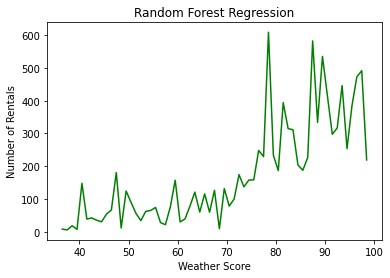

mse: 33329.224433576084
mae: 133.21698097963022
rmse: 182.56293280284495


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#df_c.drop(['typeTime'], axis = 1, inplace = True)
df_c2 = df_c.drop(['typeTime'], axis = 1)
y = df_c2.iloc[:,16:17].values
X = df_c2.iloc[:,17:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=0)

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))
X_grid = np.arange(min(X_train), max(X_train))

X_grid = X_grid.reshape((len(X_grid), 1))
#plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Weather Score')
plt.ylabel('Number of Rentals')
plt.show()

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

# Hyperparameter Tuning: Find best parameters for random forest model

In [ ]:
max_depths = [2, 3, 5, 7, 9, 11]

for max_depth in max_depths:
  model_rf = RandomForestClassifier(max_depth=max_depth)
  model_rf.fit(X_train, y_train)

  preds = model_rf.predict(X_val)
  print("max_depth = ", max_depth, ", Accuracy: ", accuracy_score(y_val, preds))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


max_depth =  2 , Accuracy:  0.011507479861910242


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


max_depth =  3 , Accuracy:  0.00805523590333717


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


max_depth =  5 , Accuracy:  0.00863060989643268


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


max_depth =  7 , Accuracy:  0.010356731875719217


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


max_depth =  9 , Accuracy:  0.010356731875719217


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


max_depth =  11 , Accuracy:  0.01093210586881473


Since the training and validation data are given at random, accuracy of the model with given max_depth parameter can be volitile. Due to that behaviour, we will have to do multiple sample run in order to determine the best outcoming paramter.
Highest accuracy score on validation set was achieved by using 2 as max_depth in our last runtime. Lastly, we will build a model where max_depth = 2 and evaluate the performance on test set.

In [ ]:
model_rf = RandomForestClassifier(max_depth=9)
model_rf.fit(X_train, y_train)

preds = model_rf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, preds))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy:  0.01380897583429229


# 2)LINEAR REGRESSION MODEL

In [ ]:
# determining feature vector
#, 'hum', 'windspeed'
weatherFeatures = ['temp', 'atemp', 'hum','windspeed']
X = df_c[weatherFeatures].values
y = df_c['cnt'].values

# creating regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
weatherModel = LinearRegression()
weatherModel.fit(X_train, y_train)

# coefficients
coeff_df = pd.DataFrame(weatherModel.coef_, weatherFeatures, columns=['Coefficient'])
print(coeff_df)

# mean error
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = weatherModel.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))

           Coefficient
temp         77.157008
atemp       321.346423
hum        -268.918720
windspeed    49.640512
mse: 24318.118415040157
rmse: 155.94267669576587
mae: 114.97298728818167


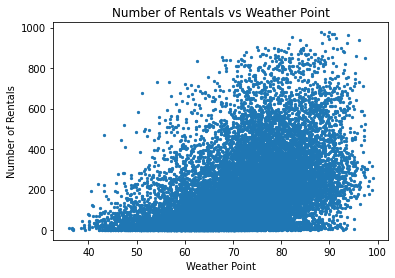

In [ ]:
# regression model
df_c["weatherPoint"] = pd.to_numeric(df_c["weatherPoint"])

df_c.plot.scatter(x="weatherPoint", y="cnt", s=5)
plt.title("Number of Rentals vs Weather Point")
plt.xlabel("Weather Point")
plt.ylabel("Number of Rentals")

plt.show()

mse: 6971.96193107112
rmse: 83.49827501853628
mae: 63.91748319298198


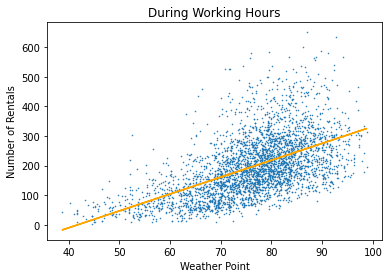

In [ ]:
a = df_c[df_c["typeTime"] == "Working Hour"]
X = a[["weatherPoint"]].values
y = a["cnt"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

reg_line = X*model.coef_[0] + model.intercept_

plt.title("During Working Hours")
plt.xlabel("Weather Point")
plt.ylabel("Number of Rentals")
plt.plot(X, reg_line, color = "orange")

plt.scatter(X,y, s=0.3)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))

In [ ]:
print("The coefficient of determination is:", model.coef_[0])
print("The intercept of the graph is:",model.intercept_)

The coefficient of determination is: 5.711931100773926
The intercept of the graph is: -239.0753274851646


mse: 34646.80704823029
rmse: 186.13652797941162
mae: 148.7743280283623


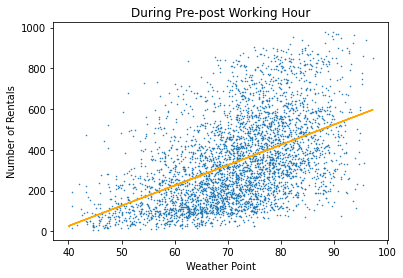

In [ ]:
a = df_c[df_c["typeTime"] == "Pre-post Working Hour"]
X = a[["weatherPoint"]].values
y = a["cnt"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

reg_line = X*model.coef_[0] + model.intercept_

plt.title("During Pre-post Working Hour")
plt.xlabel("Weather Point")
plt.ylabel("Number of Rentals")
plt.plot(X, reg_line, color = "orange")

plt.scatter(X,y, s=0.3)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))

In [ ]:
print("The coefficient of determination is:", model.coef_[0])
print("The intercept of the graph is:",model.intercept_)

The coefficient of determination is: 9.946740619965475
The intercept of the graph is: -371.53281160349144


mse: 17216.23980918263
rmse: 131.2106695706665
mae: 100.0779727391808


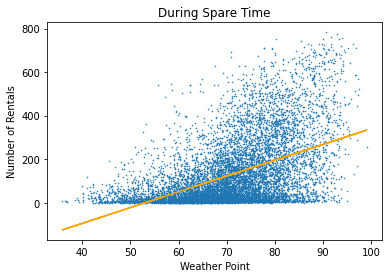

In [ ]:
a = df_c[df_c["typeTime"] == "Spare Time"]
X = a[["weatherPoint"]].values
y = a["cnt"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

reg_line = X*model.coef_[0] + model.intercept_

plt.title("During Spare Time")
plt.xlabel("Weather Point")
plt.ylabel("Number of Rentals")
plt.plot(X, reg_line, color = "orange")

plt.scatter(X,y, s=0.3)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))

In [ ]:
print("The coefficient of determination is:", model.coef_[0])
print("The intercept of the graph is:",model.intercept_)

The coefficient of determination is: 7.256422250160529
The intercept of the graph is: -385.08082267889523


# 3)POLYNOMIAL REGRESSION MODEL

Multivariable regression

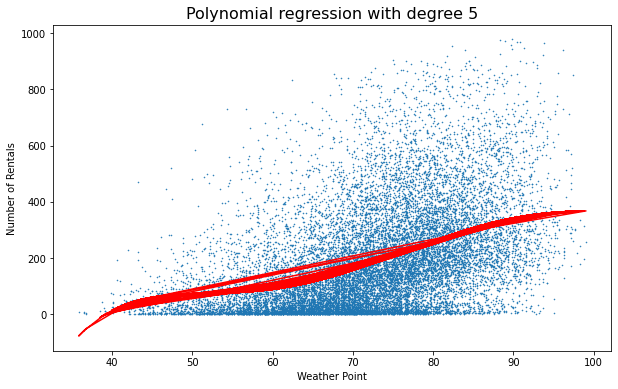

mse: 26074.8434615563
rmse: 161.4770679123085
mae: 121.08211831765205


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X = df_c[["weatherPoint"]].values
y = df_c["cnt"].values

degree = 5

poly = PolynomialFeatures(degree, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

plt.figure(figsize=(10, 6))
plt.title("Polynomial regression with degree "+str(degree), size=16)
plt.xlabel("Weather Point")
plt.ylabel("Number of Rentals")
plt.scatter(X, y, s = 0.3)
plt.plot(X, y_predicted, c="red")
plt.show()

# showing mean error rates
mse = mean_squared_error(y, y_predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_predicted)

print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))

### Implementation

<font color="lightblue">
Implement and evaluate your models. Perform hyperparameter tunning if necessary. Choose the correct evaluation metrics.
</font>


In our implementation we firstly, explored our dataset by cleaning NaN values and extracting the valuable information for our final goal, which is to create regression models that correlates feature vectors that are weather conditions and working ours to count of bike rentals.

After the initial untilization, we then proceed to claim hypothesis about our dataset and test them with regards to sample data.

After sketching correlations about the features in our data with graphs, we proceed to implement our Machine Learning Models. In order to find the best approach for our need, we decided to try three different machien learning models which are Linear Regression, Random Forest Regressor and Polynomial Regression. We modeled and fed them by training data and validate and tested it with regards to the partitioned dataset. Furthermore, we did Hyperparameter Tuning in order to fix and amplify their results.

After doing this process for each three model, we compared their mean values which corresponds to its deviation from our estimations.

In conclusion, we decided that Random Forest Regressor is the best fitting model for our dataset with regards to its deviation from test data.

## Conclusion

<font color="lightblue">
Briefly evaluate your project. Is your solution applicable? What are the advantages/disadvantages of your solution?
</font>


To sum up our project, we first decided that the bike sharing company would make the most profit if they knew about their customers' behaviour.(Whether they use it as a hobby or a transportation tool) We thought people would pile up in the pre-post working hours if the system was in fact being used more as a transportation tool which would make it more profitable to set more stations in the areas near the work places. This was in fact the case as we could inspect the stacking in the pre-post working hours. Also, by examining the regression model, we found out that the usage in the "spare time" section differed with respect to weather conditions which was not the case in the "pre-post working hours" section. The people who use the system as a transportation tool seem to be using it no matter the weather conditions. With this two factors combining; it would it fact be more profitable to set more stations favouring the workplaces, resulting in more profit.
